# Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

# Data Loading and displaying of variables
Table below shows the first and last 5 records of the data respectively. 

A brief background about the data, this data is about the conditions that are taken into consideration when detecting fetal health in order to prevent child and maternal mortality. A non-invasive procedure called Cardiotocogram (CTG) is done on the mother by placing an ultrasound on the mother's abdomen and the results of those ultrasound are analysed and recorded then a decision about the health of the fetal is deduced.

This dataset consists of all the results that were observed during the CTG procedure including the deduction about the fetal health of 2126 mothers. The fetal health in the dataset below can be classified in the following : Normal, Suspect and Pathological of which they are classified as 1.0, 2.0 and 3.0 respectively.

In [5]:
df = pd.read_csv("fetal_health.csv")
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [7]:
df.info() #All our records are non-null meaning we have zero null values. But we will double check

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [9]:
df.isnull().sum() #Zero null values

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [11]:
df["fetal_health"].unique() #Our target has 3 unique records

array([2., 1., 3.])

In [13]:
df.shape # We have 2126 rows and 22 columns

(2126, 22)

In [15]:
df.duplicated().sum() #We have 13 duplicates

13

In [17]:
duplicates = df[df.duplicated() == True] #Getting the indexes of the duplicates
duplicates

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
68,140.0,0.007,0.000,0.004,0.0,0.0,0.0,34.0,1.2,0.0,...,119.0,179.0,2.0,0.0,156.0,153.0,155.0,5.0,0.0,1.0
234,123.0,0.000,0.000,0.000,0.0,0.0,0.0,49.0,0.8,7.0,...,63.0,137.0,2.0,0.0,129.0,127.0,129.0,2.0,1.0,1.0
306,145.0,0.000,0.020,0.000,0.0,0.0,0.0,77.0,0.2,45.0,...,129.0,150.0,1.0,0.0,146.0,145.0,147.0,0.0,1.0,2.0
324,135.0,0.000,0.000,0.000,0.0,0.0,0.0,62.0,0.5,71.0,...,71.0,168.0,3.0,0.0,143.0,142.0,144.0,1.0,1.0,3.0
333,144.0,0.000,0.019,0.000,0.0,0.0,0.0,76.0,0.4,61.0,...,71.0,152.0,3.0,0.0,145.0,144.0,146.0,2.0,1.0,2.0
787,123.0,0.003,0.003,0.000,0.0,0.0,0.0,52.0,0.8,2.0,...,50.0,140.0,7.0,0.0,129.0,128.0,130.0,4.0,1.0,1.0
791,123.0,0.003,0.004,0.000,0.0,0.0,0.0,50.0,0.9,4.0,...,58.0,140.0,7.0,0.0,129.0,128.0,130.0,5.0,1.0,1.0
798,146.0,0.000,0.000,0.003,0.0,0.0,0.0,65.0,0.4,39.0,...,137.0,156.0,1.0,0.0,150.0,149.0,151.0,1.0,1.0,2.0
849,138.0,0.002,0.000,0.004,0.0,0.0,0.0,41.0,0.8,8.0,...,105.0,156.0,4.0,0.0,142.0,142.0,143.0,2.0,1.0,1.0
1113,122.0,0.000,0.000,0.000,0.0,0.0,0.0,19.0,1.9,0.0,...,103.0,142.0,1.0,0.0,120.0,120.0,122.0,3.0,0.0,1.0


In [19]:
df = df.drop_duplicates() #Dropping all duplicates

In [21]:
df.duplicated().sum() #We now have zero duplicates

0

In [23]:
df.shape #We are now 13 rows less

(2113, 22)

## Data (Variable) Description
All the attributes of this dataset are given as numeric (float). Basic statistics of the dataset is provided below.

In [25]:
df.dtypes

baseline value                                            float64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolongued_decelerations                                  float64
abnormal_short_term_variability                           float64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability    float64
mean_value_of_long_term_variability                       float64
histogram_width                                           float64
histogram_min                                             float64
histogram_max                                             float64
histogram_number_of_peaks                                 float64
histogram_

In [27]:
df.describe().T.round(3) #Data statistics

,count,mean,std,min,25%,50%,75%,max
baseline value,2113.0,133.305,9.837,106.0,126.000,133.000,140.000,160.000
accelerations,2113.0,0.003,0.004,0.0,0.000,0.002,0.006,0.019
fetal_movement,2113.0,0.010,0.047,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2113.0,0.004,0.003,0.0,0.002,0.005,0.007,0.015
light_decelerations,2113.0,0.002,0.003,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2113.0,0.000,0.000,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2113.0,0.000,0.001,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2113.0,46.994,17.178,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2113.0,1.335,0.884,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2113.0,9.795,18.337,0.0,0.000,0.000,11.000,91.000


In [29]:
normal = df[df["fetal_health"] == 1.0].shape[0] #number of normal fetal health
suspect = df[df["fetal_health"] == 2.0].shape[0] #number of suspected fetal health
pathological = df[df["fetal_health"] == 3.0].shape[0] #number of pathological fetal health
print("Normal :",normal)
print("Suspect :",suspect)
print("Pathological :",pathological)

Normal : 1646
Suspect : 292
Pathological : 175


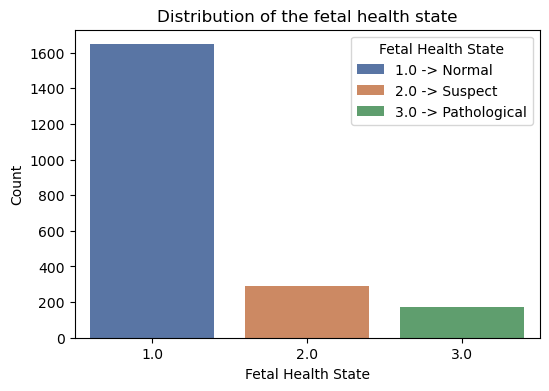

In [31]:
labels = ["1.0 -> Normal", "2.0 -> Suspect", "3.0 -> Pathological"]
plt.figure(figsize=(6, 4))
plt.title("Distribution of the fetal health state")
sns.countplot(x="fetal_health", data=df, palette="deep", hue ="fetal_health")
plt.legend(title="Fetal Health State", labels=labels)
plt.xlabel("Fetal Health State")
plt.ylabel("Count")
plt.savefig("fetal_health.png", dpi=300, bbox_inches="tight")
plt.show()

## Decision Tree Model
The features are declared as X of which they include all the attributes of this dataset except the target variable which is "fetal_health", hence it is dropped. The target is declared as "y" which is the "fetal_health" attribute. The model utilized is the decision tree and the data is split into  80% training data and 20% training data.

In [87]:
X = df.drop(["fetal_health"], axis = 1) #Features
y = df[["fetal_health"]] #Target

In [727]:
# X

In [1057]:
# Normalization
# X = (X - np.min(X)) / (np.max(X) - np.min(X))

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [145]:
dt = DecisionTreeClassifier(max_depth=6) #Model decleration
dt.fit(X_train, y_train) #Training the data model

DecisionTreeClassifier(max_depth=6)

Predicting the fetal health using the data that the model was not trained with.

In [147]:
y_pred = dt.predict(X_test)
print(y_pred) #Printing the predictions

[1. 1. 1. 1. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 3. 1. 1. 1. 1. 1. 3. 1. 3. 1.
 1. 1. 2. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 2. 1. 2. 1. 1.
 1. 3. 1. 2. 2. 1. 2. 3. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 3. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 2.
 1. 1. 1. 2. 1. 1. 1. 2. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 2. 1. 1. 1. 1. 1. 1. 2. 3. 1. 1. 1. 1. 1. 1. 2. 1. 2. 1. 1. 1. 1. 1.
 1. 1. 2. 2. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 2. 1. 2. 1. 1. 1. 3. 3. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 3. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 3.
 1. 1. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 3. 1. 1. 1. 1.
 3. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 3. 1. 1. 1. 3. 1. 1. 1. 1. 1. 1. 1.
 3. 1. 1. 3. 1. 1. 1. 1. 1. 1. 3. 1. 3. 1. 3. 1. 1. 1. 1. 1. 3. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 3.

In [149]:
accuracy = accuracy_score(y_test, y_pred) #Calculating the accuracy between the actual y_test values against the predicted values
print("Accuracy : {:.2f}%".format(accuracy*100))

Accuracy : 94.09%


In [151]:
print(round(dt.score(X_test, y_test)*100, 2)) #This score method of accuracy produces the same results as well.

94.09


In [153]:
features = []
targets = []

for feature in X_train.columns:
    features.append(feature)
# features

for target in y.columns:
    targets.append(target)
# targets


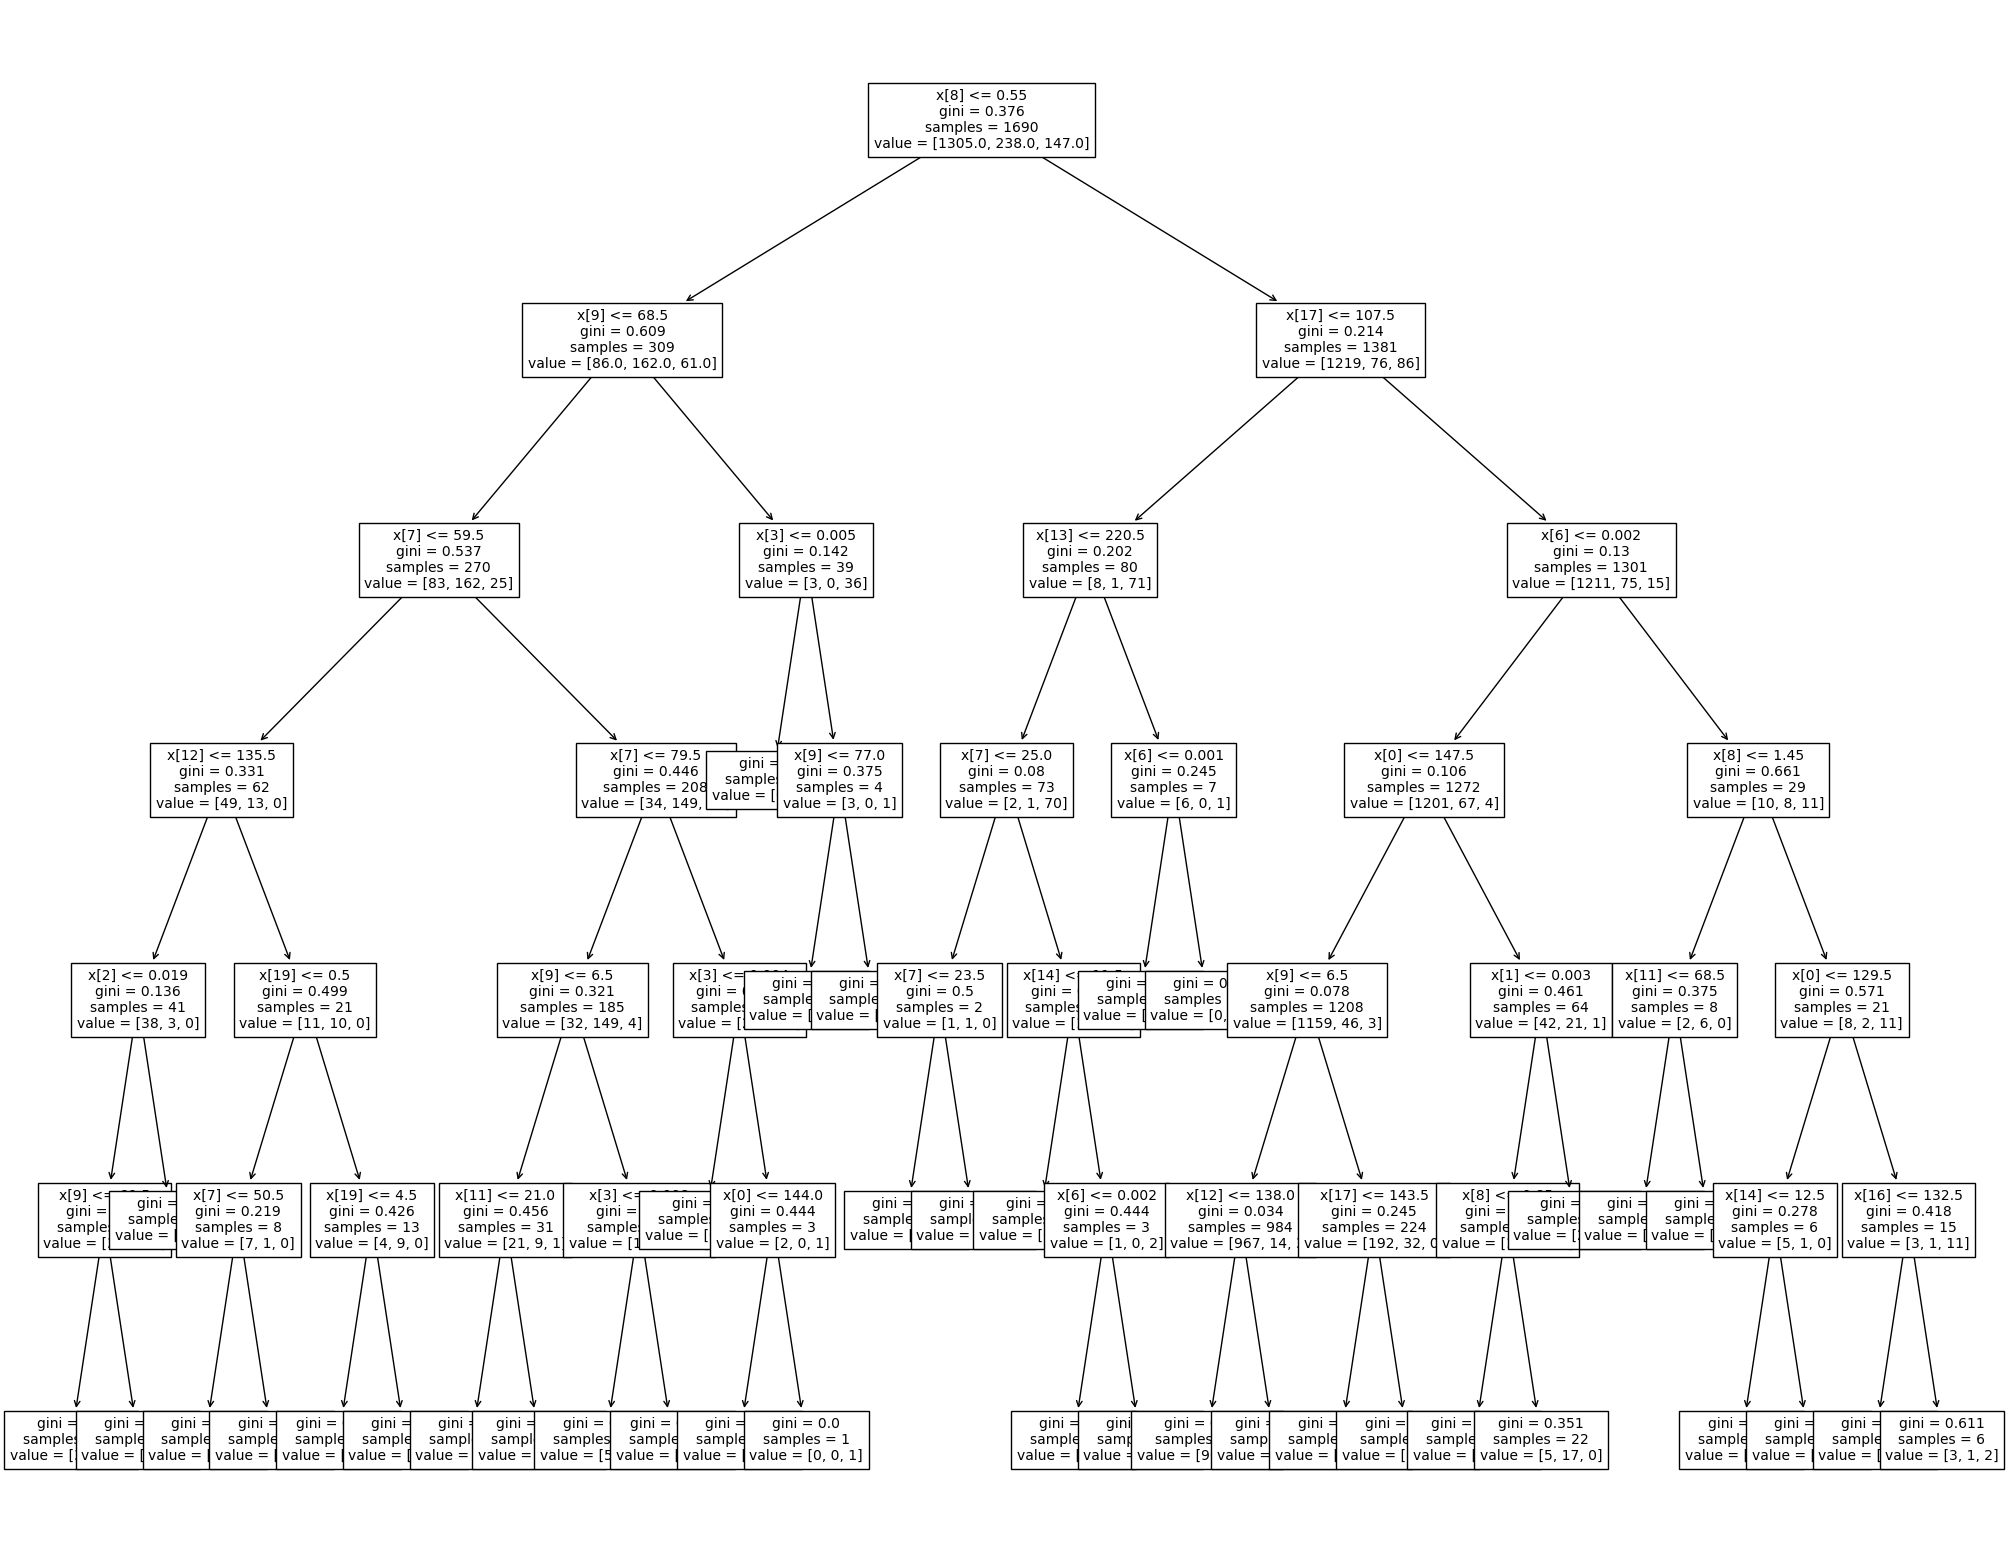

In [173]:
plt.figure(figsize=(25, 20))
plot_tree(dt, fontsize=10)
plt.show()

# Data Reference
Ayres de Campos et al. (2000) SisPorto 2.0 A Program for Automated Analysis of Cardiotocograms. J Matern Fetal Med 5:311-318 (link)

https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification/data

In [61]:
df["fetal_health"]

0       2.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
2121    2.0
2122    2.0
2123    2.0
2124    2.0
2125    1.0
Name: fetal_health, Length: 2113, dtype: float64

In [105]:
X_train.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency'],
      dtype='object')